In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib.gridspec import GridSpec
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calmap
from datetime import datetime, timedelta

In [4]:
ev2w = pd.read_csv("Electric_2_Wheeler_Sales.csv")
ev3w = pd.read_csv("Electric_3_Wheeler_Sales.csv")
ev4w = pd.read_csv("Electric_4_Wheeler_Sales.csv")
evbus = pd.read_csv("Electric_Bus_Sales.csv")
electrical_consumption = pd.read_csv("Electrical_Consumptiondataa.csv")
charging_stations=pd.read_csv("Statewise_EV_Charging_Stations.csv")

In [5]:
ev2w.info()
ev2w.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    8 non-null      int64  
 1   Year    8 non-null      object 
 2   Apr     8 non-null      int64  
 3   May     8 non-null      int64  
 4   Jun     8 non-null      int64  
 5   Jul     8 non-null      int64  
 6   Aug     8 non-null      int64  
 7   Sep     8 non-null      int64  
 8   Oct     8 non-null      int64  
 9   Nov     7 non-null      float64
 10  Dec     7 non-null      float64
 11  Jan     7 non-null      float64
 12  Feb     7 non-null      float64
 13  Mar     7 non-null      float64
 14  Total   8 non-null      int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.1+ KB


,S.No,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,1,FY18,96,91,137,116,99,109,160,214.0,189.0,176.0,156.0,462.0,2005
1,2,FY19,486,681,955,1281,1570,2258,2560,3311.0,3171.0,2745.0,3121.0,5868.0,28007
2,3,FY20,3079,1668,1758,1568,1507,1558,2136,3147.0,2235.0,2942.0,2353.0,2883.0,26834
3,4,FY21,85,558,1511,1488,2115,3089,2953,4188.0,4948.0,5319.0,6579.0,11970.0,44803
4,5,FY22,5636,1315,4751,14692,16099,17959,20704,24503.0,26862.0,30041.0,35759.0,54320.0,252641
5,6,FY23,52389,41727,44054,46584,53129,55124,78236,77376.0,65106.0,62891.0,66091.0,85347.0,728054
6,7,FY24,66877,105582,46106,54614,62767,64077,75144,92018.0,75855.0,82018.0,82508.0,136560.0,944126
7,8,FY25,65550,77326,79995,107627,89013,90291,80850,NaN,NaN,NaN,NaN,NaN,590652


In [6]:
ev3w.info()
ev3w.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    8 non-null      int64  
 1   Year    8 non-null      object 
 2   Apr     8 non-null      int64  
 3   May     8 non-null      int64  
 4   Jun     8 non-null      int64  
 5   Jul     8 non-null      int64  
 6   Aug     8 non-null      int64  
 7   Sep     8 non-null      int64  
 8   Oct     8 non-null      int64  
 9   Nov     7 non-null      float64
 10  Dec     7 non-null      float64
 11  Jan     7 non-null      float64
 12  Feb     7 non-null      float64
 13  Mar     7 non-null      float64
 14  Total   8 non-null      int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.1+ KB


,S.No,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,1,FY18,4748,6720,7178,8775,8905,7414,7250,9598.0,8719.0,8750.0,6904.0,7009.0,91970
1,2,FY19,6593,7276,7556,9844,9990,11130,12305,10517.0,12501.0,10533.0,8786.0,9000.0,116031
2,3,FY20,7888,8256,9187,10746,11527,14340,13261,15543.0,14422.0,13553.0,13622.0,10706.0,143051
3,4,FY21,870,668,4662,5871,5937,7747,7946,8537.0,10242.0,10931.0,12550.0,14937.0,90898
4,5,FY22,7951,1048,6338,1853,13309,16964,18497,18690.0,24118.0,19548.0,19621.0,24606.0,172543
5,6,FY23,21626,24100,27846,30489,33055,37404,35889,40403.0,35542.0,34308.0,35995.0,45225.0,401882
6,7,FY24,38083,44698,48151,53877,56860,57547,57006,53912.0,57653.0,53459.0,50598.0,60641.0,632485
7,8,FY25,42033,54731,52306,63679,60745,62898,42002,NaN,NaN,NaN,NaN,NaN,378394


In [7]:
ev4w.info()
ev4w.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    8 non-null      int64  
 1   Year    8 non-null      object 
 2   Apr     8 non-null      int64  
 3   May     8 non-null      int64  
 4   Jun     8 non-null      int64  
 5   Jul     8 non-null      int64  
 6   Aug     8 non-null      int64  
 7   Sep     8 non-null      int64  
 8   Oct     8 non-null      int64  
 9   Nov     7 non-null      float64
 10  Dec     7 non-null      float64
 11  Jan     7 non-null      float64
 12  Feb     7 non-null      float64
 13  Mar     7 non-null      float64
 14  Total   8 non-null      int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.1+ KB


,S.No,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,1,FY18,89,162,81,73,95,116,113,86.0,81.0,96.0,116.0,96.0,1204
1,2,FY19,146,175,210,179,116,139,75,176.0,126.0,74.0,228.0,241.0,1885
2,3,FY20,139,65,57,111,100,180,194,218.0,105.0,290.0,493.0,425.0,2377
3,4,FY21,3,84,296,357,371,338,462,567.0,525.0,650.0,615.0,886.0,5154
4,5,FY22,634,257,817,1119,1105,1322,1383,1629.0,2617.0,1563.0,2452.0,3724.0,18622
5,6,FY23,2255,2967,3214,3410,3371,3548,3916,3981.0,3832.0,3439.0,4738.0,8828.0,47499
6,7,FY24,6041,7718,7974,7771,7016,6365,7602,7526.0,7490.0,8440.0,7438.0,9051.0,90432
7,8,FY25,7781,8081,7308,8000,6738,6062,5336,NaN,NaN,NaN,NaN,NaN,49306


In [8]:
evbus.info()
evbus.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    8 non-null      int64  
 1   Year    8 non-null      object 
 2   Apr     8 non-null      int64  
 3   May     8 non-null      int64  
 4   Jun     8 non-null      int64  
 5   Jul     8 non-null      int64  
 6   Aug     8 non-null      int64  
 7   Sep     8 non-null      int64  
 8   Oct     8 non-null      int64  
 9   Nov     7 non-null      float64
 10  Dec     7 non-null      float64
 11  Jan     7 non-null      float64
 12  Feb     7 non-null      float64
 13  Mar     7 non-null      float64
 14  Total   8 non-null      int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.1+ KB


,S.No,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,1,FY18,0,2,1,0,0,0,0,11.0,0.0,0.0,0.0,5.0,19
1,2,FY19,0,2,1,0,0,0,1,7.0,2.0,5.0,43.0,5.0,66
2,3,FY20,20,38,30,35,80,33,82,30.0,51.0,9.0,19.0,7.0,434
3,4,FY21,0,0,0,0,0,1,8,34.0,10.0,39.0,186.0,95.0,373
4,5,FY22,155,84,70,49,80,79,84,34.0,220.0,128.0,133.0,78.0,1194
5,6,FY23,165,165,145,207,227,206,241,117.0,161.0,139.0,113.0,98.0,1984
6,7,FY24,88,280,204,144,269,258,239,268.0,577.0,549.0,345.0,472.0,3693
7,8,FY25,240,247,135,450,243,409,257,NaN,NaN,NaN,NaN,NaN,1981


In [9]:
electrical_consumption.info()
electrical_consumption.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Region                                                                                             18 non-null     object 
 1   Electricity Consumed in EV Charging Stations (excl. Heavy Duty) (in MU) from april 2024 to august  18 non-null     float64
 2   Electricity Consumed in Heavy Duty PCS only (in MU) from april 2024 to august                      18 non-null     float64
 3   Total Electricity Consumed(in MU)                                                                  18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 708.0+ bytes


,Region,Electricity Consumed in EV Charging Stations (excl. Heavy Duty) (in MU) from april 2024 to august,Electricity Consumed in Heavy Duty PCS only (in MU) from april 2024 to august,Total Electricity Consumed(in MU)
0,Chandigarh,0.17,2.88,3.05
1,Delhi,61.25,84.30,145.54
2,Haryana,9.16,0.20,9.35
3,Rajasthan,2.96,0.73,3.69
4,Uttar Pradesh,0.10,0.00,0.10
5,Gujarat,1.21,23.96,25.17
6,Madhya Pradesh,0.24,1.29,1.54
7,Maharashtra*,8.92,62.81,71.73
8,Andhra Pradesh,0.54,9.10,9.63
9,Karnataka,2.88,1.48,4.36


In [10]:
charging_stations.info()
charging_stations.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               34 non-null     object
 1   Operational PCS (as of 02.02.2024)  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


,State,Operational PCS (as of 02.02.2024)
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124
5,Chandigarh,12
6,Chhattisgarh,149
7,D&D and DNH,1
8,Delhi,1886
9,Goa,113


In [11]:
#styles

plt.style.use('seaborn-v0_8-dark')
sns.set_palette("husl")

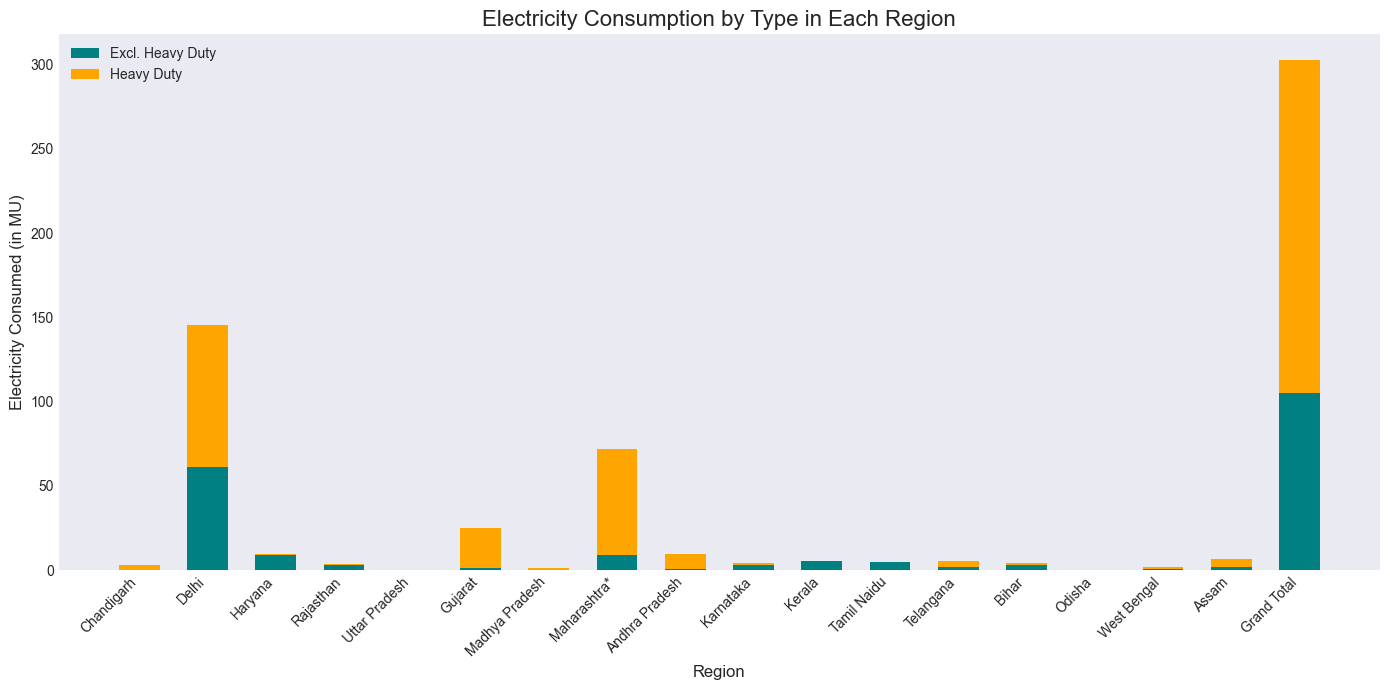

In [12]:
# Stacked Bar Plot
x = np.arange(len(electrical_consumption['Region']))  
width = 0.6

plt.figure(figsize=(14, 7))
plt.bar(x, electrical_consumption['Electricity Consumed in EV Charging Stations (excl. Heavy Duty) (in MU) from april 2024 to august'], width, label='Excl. Heavy Duty', color='teal')
plt.bar(x, electrical_consumption['Electricity Consumed in Heavy Duty PCS only (in MU) from april 2024 to august'], width, bottom=electrical_consumption['Electricity Consumed in EV Charging Stations (excl. Heavy Duty) (in MU) from april 2024 to august'], label='Heavy Duty', color='orange')
plt.title('Electricity Consumption by Type in Each Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Electricity Consumed (in MU)', fontsize=12)
plt.xticks(x, electrical_consumption['Region'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


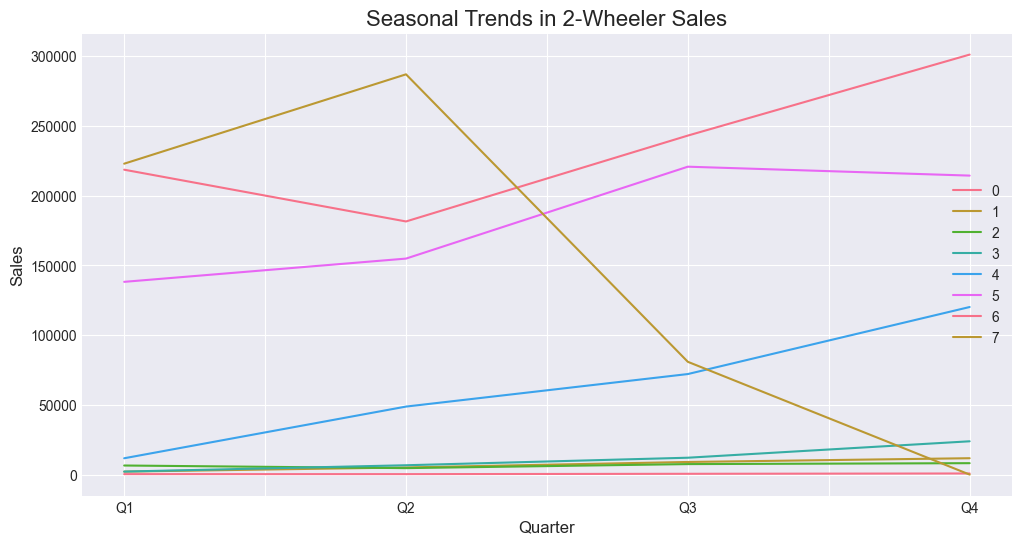

In [13]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
ev2w['Q1'] = ev2w[['Apr', 'May', 'Jun']].sum(axis=1)
ev2w['Q2'] = ev2w[['Jul', 'Aug', 'Sep']].sum(axis=1)
ev2w['Q3'] = ev2w[['Oct', 'Nov', 'Dec']].sum(axis=1)
ev2w['Q4'] = ev2w[['Jan', 'Feb', 'Mar']].sum(axis=1)

# Plot seasonal trends
ev2w[quarters].T.plot(kind='line', figsize=(12, 6))
plt.title('Seasonal Trends in 2-Wheeler Sales', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.show()



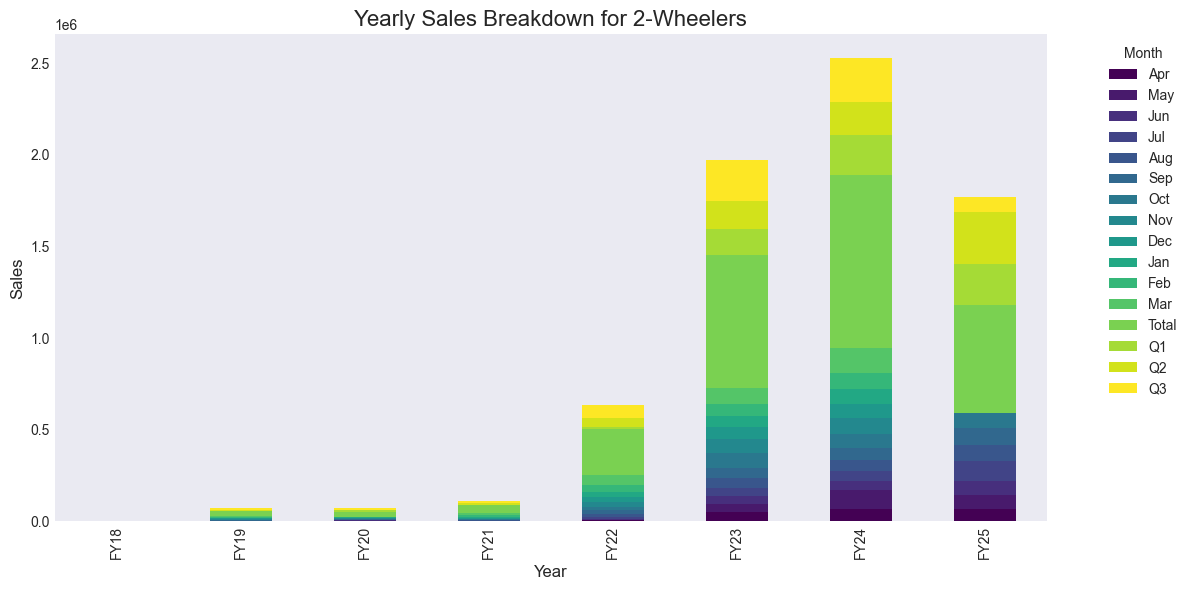

In [14]:
ev2w.set_index('Year').iloc[:, 1:-1].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Yearly Sales Breakdown for 2-Wheelers', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


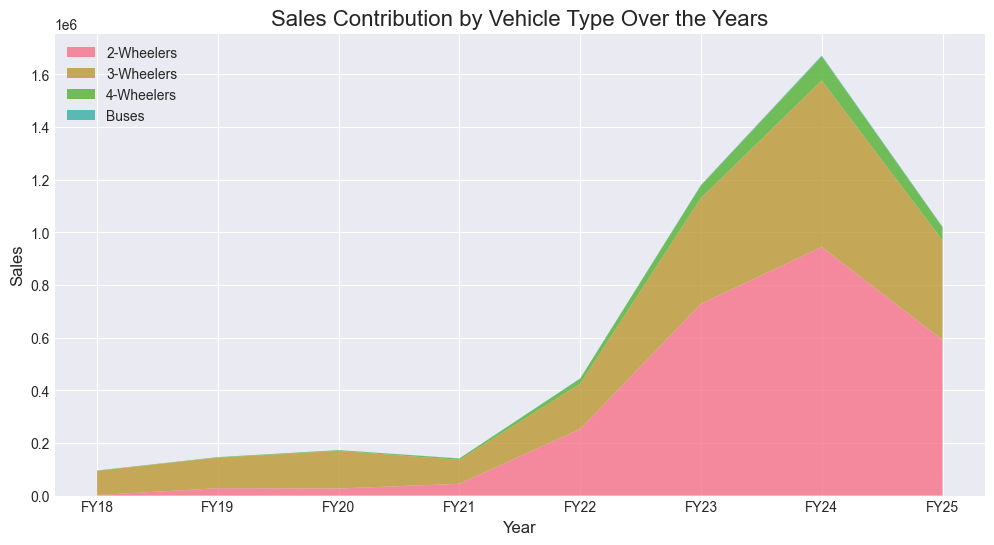

In [15]:
# Combine yearly total sales for all vehicle types
combined_sales = pd.DataFrame({
    'Year': ev2w['Year'],
    '2-Wheelers': ev2w['Total'],
    '3-Wheelers': ev3w['Total'],
    '4-Wheelers': ev4w['Total'],
    'Buses': evbus['Total']
})

# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(combined_sales['Year'], combined_sales['2-Wheelers'], combined_sales['3-Wheelers'], combined_sales['4-Wheelers'], combined_sales['Buses'], labels=['2-Wheelers', '3-Wheelers', '4-Wheelers', 'Buses'], alpha=0.8)
plt.title('Sales Contribution by Vehicle Type Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(loc='upper left')
plt.grid()
plt.show()


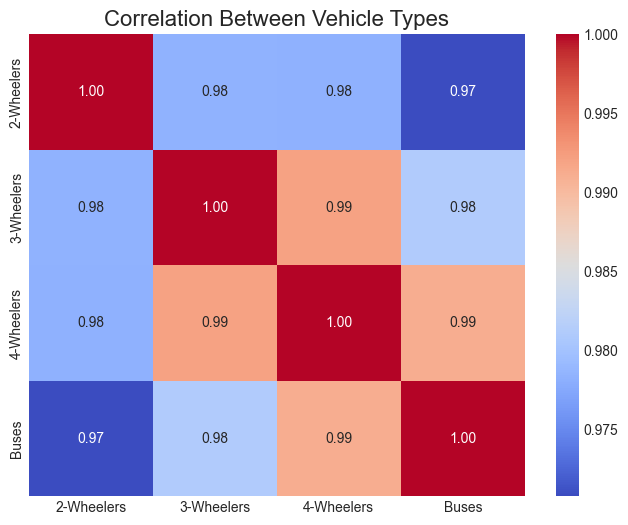

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(combined_sales.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Vehicle Types', fontsize=16)
plt.show()




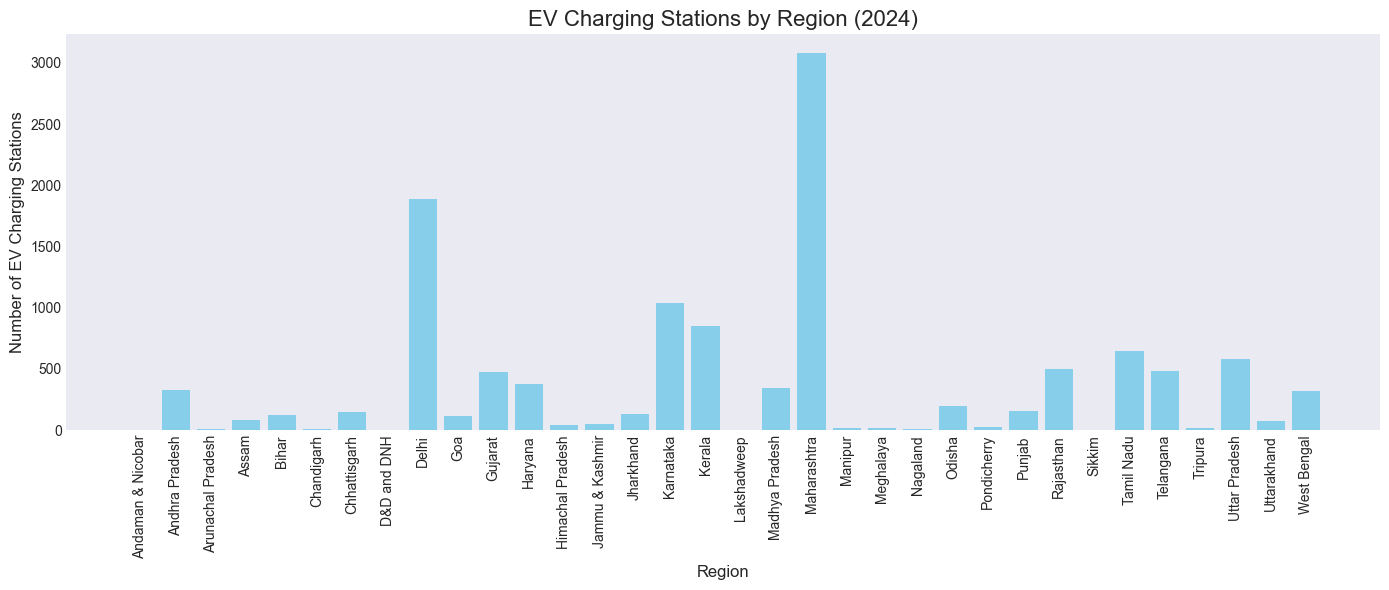

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparing  the data
data = {
    'Region': [
        'Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
        'Chandigarh', 'Chhattisgarh', 'D&D and DNH', 'Delhi', 'Goa', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
        'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan',
        'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
        'West Bengal'
    ],
    'EV Charging Stations': [
        3, 327, 9, 86, 124, 12, 149, 1, 1886, 113, 476, 377, 44, 47, 135, 1041, 852, 1, 
        341, 3079, 17, 21, 6, 198, 23, 158, 500, 2, 643, 481, 18, 582, 76, 318
    ]
}
df = pd.DataFrame(data)

# Bar plot/
plt.figure(figsize=(14, 6))
plt.bar(df['Region'], df['EV Charging Stations'], color='skyblue')
plt.title('EV Charging Stations by Region (2024)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of EV Charging Stations', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


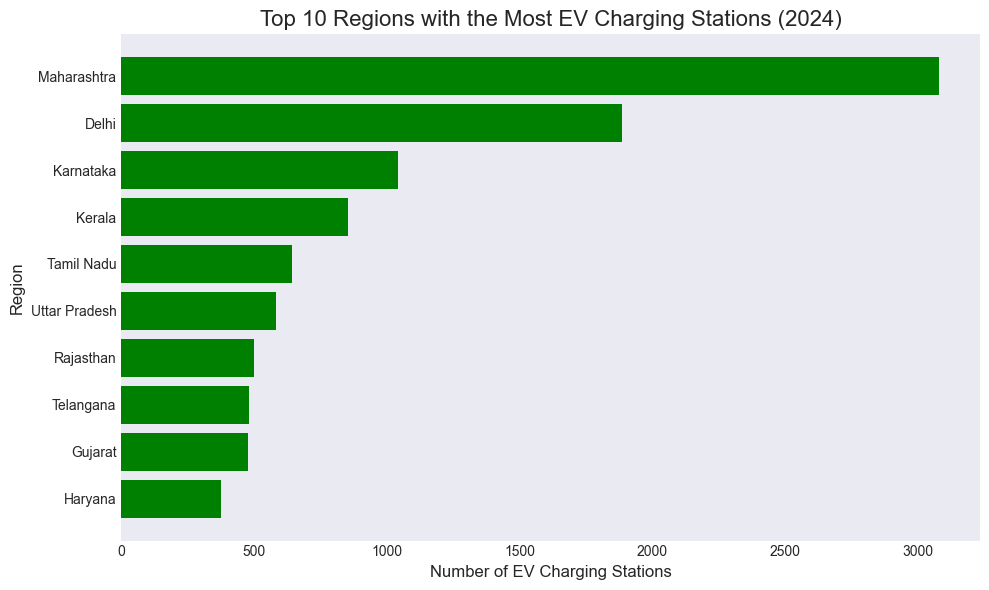

In [18]:
# Sort and select top 10
top_10 = df.sort_values('EV Charging Stations', ascending=False).head(10)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['Region'], top_10['EV Charging Stations'], color='green')
plt.title('Top 10 Regions with the Most EV Charging Stations (2024)', fontsize=16)
plt.xlabel('Number of EV Charging Stations', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order
plt.tight_layout()
plt.show()


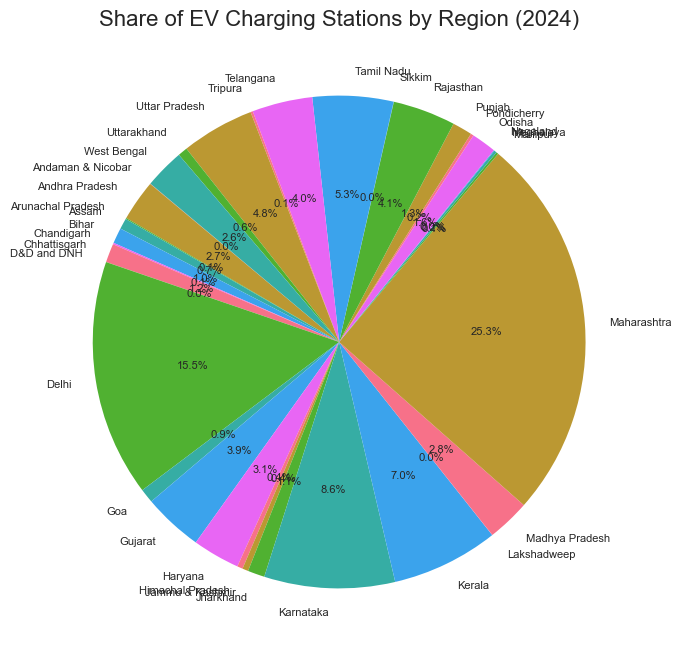

In [19]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(df['EV Charging Stations'], labels=df['Region'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Share of EV Charging Stations by Region (2024)', fontsize=16)
plt.show()


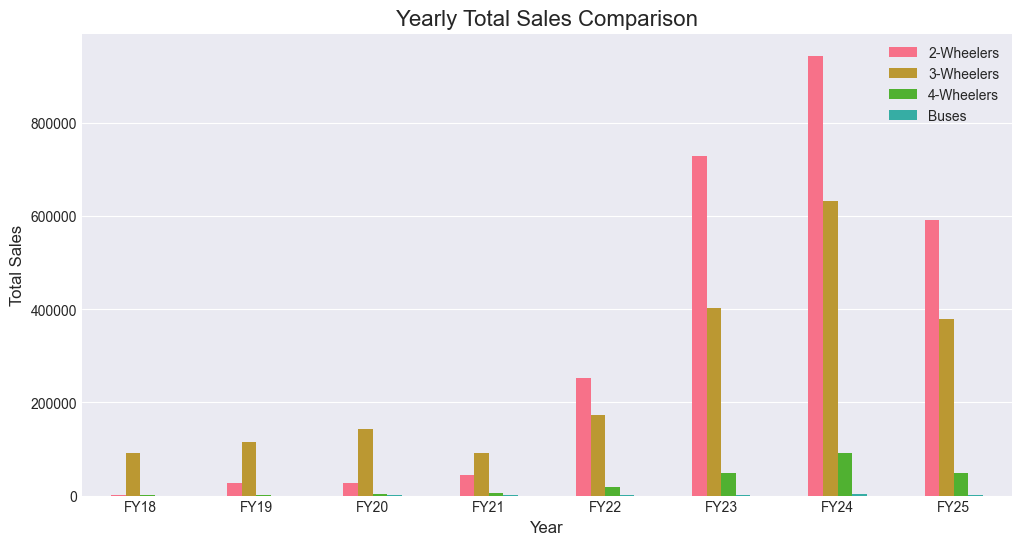

In [20]:
# Combine total sales from all datasets
total_sales = {
    'Year': ev2w['Year'],
    '2-Wheelers': ev2w['Total'],
    '3-Wheelers': ev3w['Total'],
    '4-Wheelers': ev4w['Total'],
    'Buses': evbus['Total']
}
total_df = pd.DataFrame(total_sales)

total_df.plot(x='Year', kind='bar', figsize=(12, 6))
plt.title('Yearly Total Sales Comparison', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [21]:

def load_ev_data():
    # Loading the datasets
    ev2w = pd.read_csv("Electric_2_Wheeler_Sales.csv")
    ev3w = pd.read_csv("Electric_3_Wheeler_Sales.csv")
    ev4w = pd.read_csv("Electric_4_Wheeler_Sales.csv")
    evbus = pd.read_csv("Electric_Bus_Sales.csv")
    electrical_consumption = pd.read_csv("Electrical_Consumptiondataa.csv")
    
    # Create charging stations dataframe
    charging_data = [
        ["Andhra Pradesh", 327],
        ["Arunachal Pradesh", 9],
        ["Assam", 86],
        ["Bihar", 124],
        ["Chandigarh", 12],
        ["Delhi", 1886],
        ["Gujarat", 476],
        ["Haryana", 377],
        ["Karnataka", 1041],
        ["Kerala", 852],
        ["Madhya Pradesh", 341],
        ["Maharashtra", 3079],
        ["Odisha", 198],
        ["Rajasthan", 500],
        ["Tamil Nadu", 643],
        ["Telangana", 481],
        ["Uttar Pradesh", 582],
        ["West Bengal", 318]
    ]
    
    charging_stations = pd.DataFrame(charging_data, columns=['State', 'Operational_PCS'])
    return ev2w, ev3w, ev4w, evbus, electrical_consumption, charging_stations

def plot_ev_sales_trends():
    """Plot and display EV sales trends"""
    ev2w, ev3w, ev4w, evbus, _, _ = load_ev_data()
    
    plt.figure(figsize=(15, 8))
    
    # Plot yearly totals for complete years only
    years = ev2w[ev2w['Total'].notna()]['Year'].values
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    
    for (df, label), color in zip([(ev2w, '2 Wheelers'), 
                                 (ev3w, '3 Wheelers'), 
                                 (ev4w, '4 Wheelers'), 
                                 (evbus, 'Buses')], colors):
        totals = df[df['Year'].isin(years)]['Total'].values
        plt.plot(years, totals, marker='o', label=label, color=color, linewidth=2, markersize=8)
    
    plt.title('EV Sales Trends by Vehicle Type (2018-2025)', fontsize=14, pad=20)
    plt.xlabel('Fiscal Year', fontsize=12)
    plt.ylabel('Total Sales (Log Scale)', fontsize=12)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    for df, label in [(ev2w, '2W'), (ev3w, '3W'), (ev4w, '4W'), (evbus, 'Bus')]:
        totals = df[df['Year'].isin(years)]['Total'].values
        for i, value in enumerate(totals):
            if not np.isnan(value):
                plt.annotate(f'{int(value):,}', 
                           (years[i], value),
                           textcoords="offset points",
                           xytext=(0,10),
                           ha='center',
                           fontsize=8)
    
    plt.tight_layout()
    

def plot_charging_infrastructure():
    """Plot and display charging infrastructure analysis"""
    _, _, _, _, electrical_consumption, charging_stations = load_ev_data()
    
    merged_data = pd.merge(electrical_consumption, charging_stations, 
                          left_on='Region', right_on='State', how='inner')
    
    plt.figure(figsize=(15, 8))
    
    # Create scatter plot
    scatter = plt.scatter(merged_data['Operational_PCS'], 
                         merged_data['Total Electricity Consumed(in MU)'],
                         alpha=0.6,
                         s=100,
                         c=merged_data['Total Electricity Consumed(in MU)'],
                         cmap='viridis')
    
    for i, txt in enumerate(merged_data['Region']):
        plt.annotate(txt, 
                    (merged_data['Operational_PCS'].iloc[i], 
                     merged_data['Total Electricity Consumed(in MU)'].iloc[i]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    plt.colorbar(scatter, label='Total Electricity Consumed (MU)')
    plt.xlabel('Number of Operational Charging Stations', fontsize=12)
    plt.ylabel('Total Electricity Consumed (MU)', fontsize=12)
    plt.title('Charging Infrastructure vs Electricity electrical_Consumption by State', fontsize=14, pad=20)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
   
def train_sales_prediction_model():
    ev2w, _, _, _, _, _ = load_ev_data()

    features = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']
    target = 'Mar'
    
    complete_data = ev2w.dropna(subset=features + [target])
    
    X = complete_data[features].values
    y = complete_data[target].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        results[name] = {
            'R2 Score': r2_score(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
        }
    
    return results

def analyze_charging_density():
    """Plot and display charging station density analysis"""
    _, _, _, _, _, charging_stations = load_ev_data()
    
    # Population data
    population_data = [
        ["Andhra Pradesh", 54.02],
        ["Arunachal Pradesh", 1.64],
        ["Assam", 36.19],
        ["Bihar", 141.06],
        ["Chandigarh", 1.27],
        ["Delhi", 21.05],
        ["Gujarat", 74.81],
        ["Haryana", 32.17],
        ["Karnataka", 72.36],
        ["Kerala", 36.01],
        ["Madhya Pradesh", 90.02],
        ["Maharashtra", 127.14],
        ["Odisha", 48.72],
        ["Rajasthan", 84.29],
        ["Tamil Nadu", 79.25],
        ["Telangana", 41.48],
        ["Uttar Pradesh", 248.96],
        ["West Bengal", 102.72]
    ]
    
    population_df = pd.DataFrame(population_data, columns=['State', 'Population_Millions'])
    
    # Calculate density metrics
    merged_df = pd.merge(charging_stations, population_df, on='State')
    merged_df['Stations_per_Million'] = merged_df['Operational_PCS'] / merged_df['Population_Millions']

    plt.figure(figsize=(15, 8))
    
    # Create bar plot with custom colors
    bars = sns.barplot(data=merged_df.sort_values('Stations_per_Million', ascending=False),
                      x='State', y='Stations_per_Million',hue='State',
                      palette='viridis',legend=False)
    
    plt.xticks(rotation=45, ha='right')
    
    for i, bar in enumerate(bars.patches):
        plt.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                f'{bar.get_height():.1f}',
                ha='center', va='bottom',
                fontsize=9)
    
    plt.title('EV Charging Stations per Million Population by State', fontsize=14, pad=20)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Charging Stations per Million People', fontsize=12)
    
    plt.tight_layout()


Generating visualizations...

1. Plotting EV Sales Trends...

2. Plotting Charging Infrastructure Analysis...

3. Plotting Charging Station Density Analysis...

Training Machine Learning Models...

Machine Learning Model Results:

Linear Regression:
R2 Score: 0.9673
RMSE: 488.9143

Random Forest:
R2 Score: -10.6781
RMSE: 9237.0162


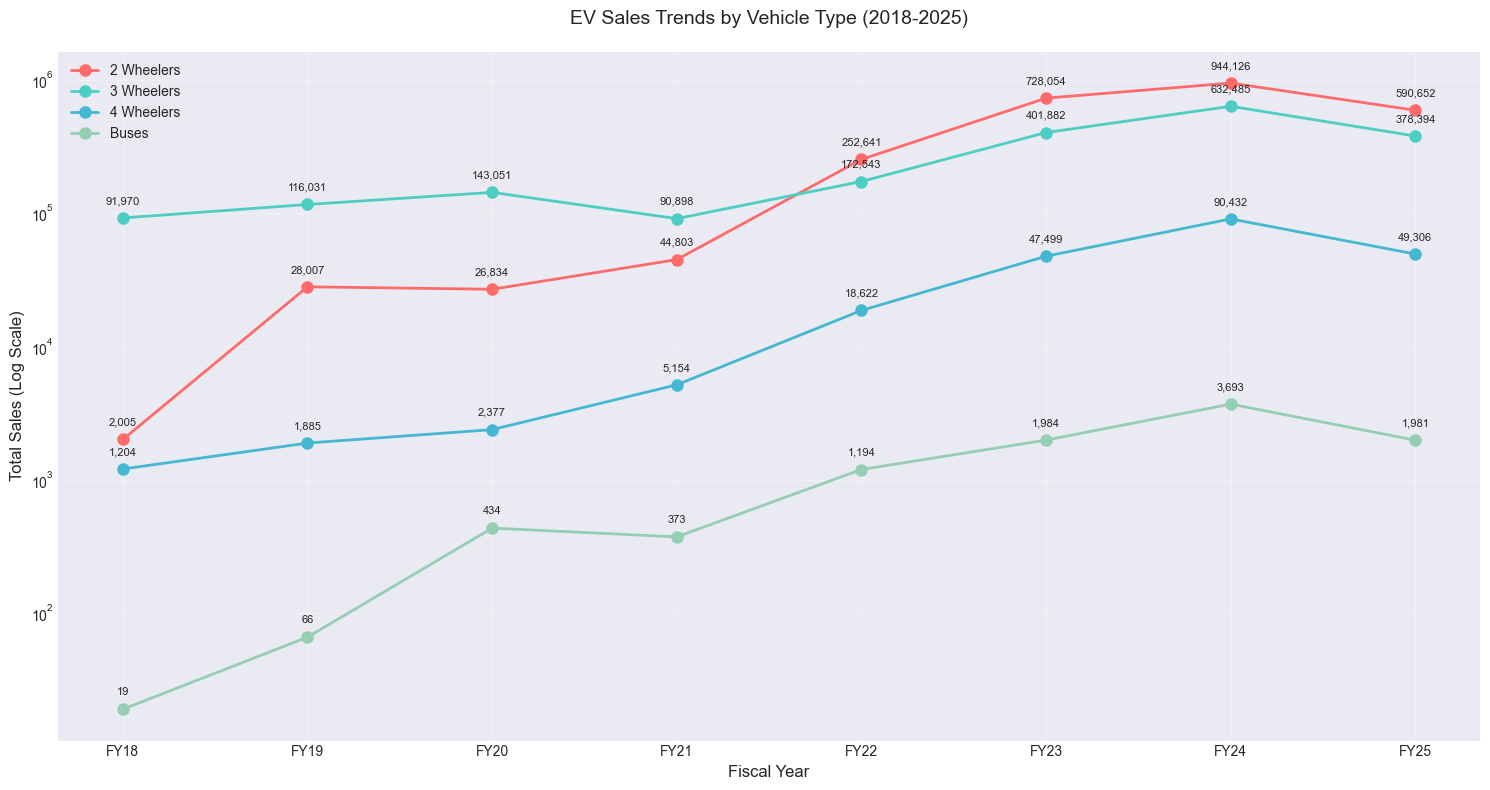

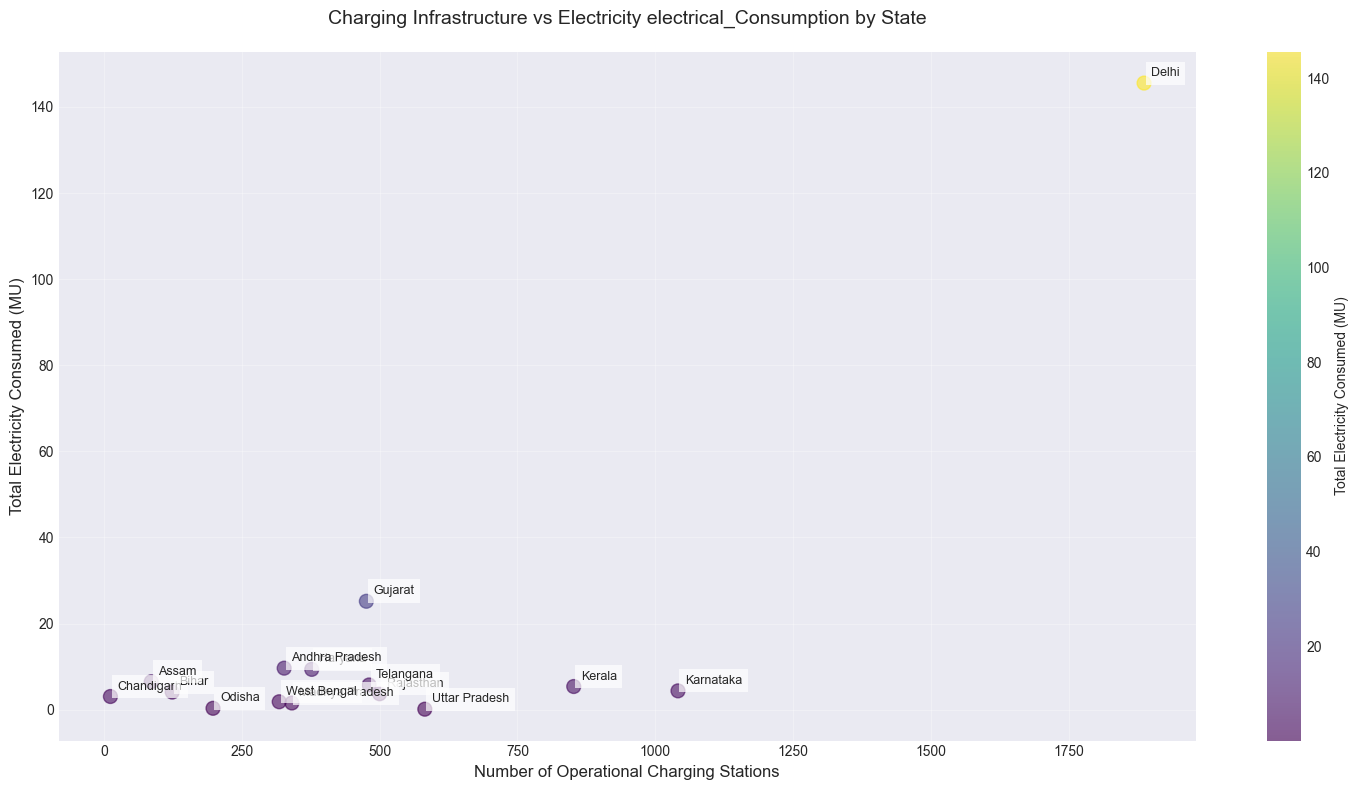

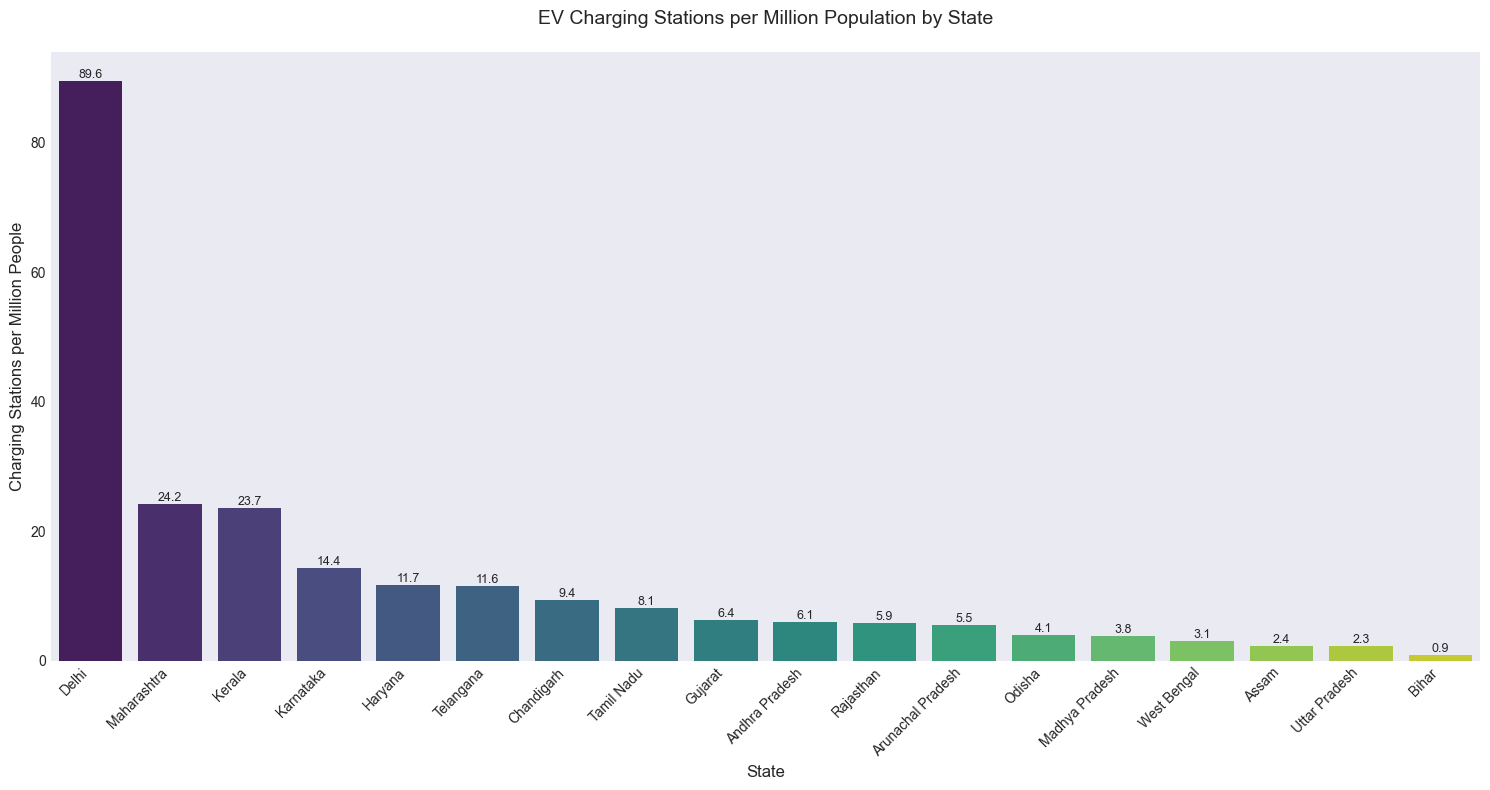

In [22]:
# Main execution
if __name__ == "__main__":
    try:
        print("Generating visualizations...\n")
        
        print("1. Plotting EV Sales Trends...")
        plot_ev_sales_trends()
        
        print("\n2. Plotting Charging Infrastructure Analysis...")
        plot_charging_infrastructure()
        
        print("\n3. Plotting Charging Station Density Analysis...")
        analyze_charging_density()
        
        # Train and display ML results
        print("\nTraining Machine Learning Models...")
        ml_results = train_sales_prediction_model()
        print("\nMachine Learning Model Results:")
        for model, metrics in ml_results.items():
            print(f"\n{model}:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.4f}")
                
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

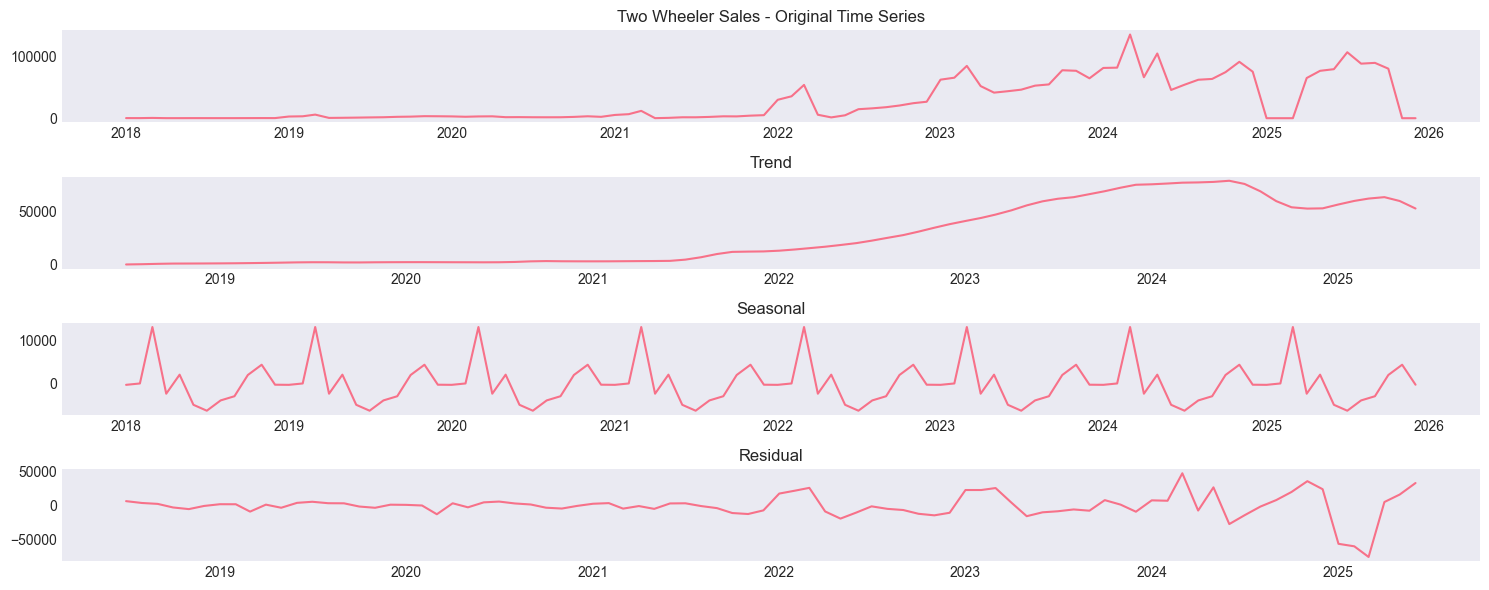

In [23]:
ev2w = pd.read_csv('Electric_2_Wheeler_Sales.csv')
ev3w = pd.read_csv('Electric_3_Wheeler_Sales.csv')
ev4w = pd.read_csv('Electric_4_Wheeler_Sales.csv')
evbus = pd.read_csv('Electric_Bus_Sales.csv')
electricity_consumption = pd.read_csv('Electrical_Consumptiondataa.csv')

def preprocess_sales_data(df):
    
    df_melted = df.melt(id_vars=['S.No', 'Year'], 
                         var_name='Month', 
                         value_name='Sales')
    df_melted = df_melted[df_melted['Month'] != 'Total']
    return df_melted

# 1. Time Series Analysis with Decomposition
def time_series_decomposition(data, title):
    plt.figure(figsize=(15, 6))
    
    # Aggregate monthly sales
    monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
    monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].str.replace('FY', '') + '-' + 
                                            monthly_sales['Month'], format='%y-%b')
    monthly_sales = monthly_sales.sort_values('Date')
    
    # Decomposition
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(monthly_sales['Sales'], period=12)
    
    plt.subplot(4,1,1)
    plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
    plt.title(f'{title} - Original Time Series')
    
    plt.subplot(4,1,2)
    plt.plot(monthly_sales['Date'], result.trend)
    plt.title('Trend')
    
    plt.subplot(4,1,3)
    plt.plot(monthly_sales['Date'], result.seasonal)
    plt.title('Seasonal')
    
    plt.subplot(4,1,4)
    plt.plot(monthly_sales['Date'], result.resid)
    plt.title('Residual')
    
    plt.tight_layout()
    plt.show()


ev2w_melted = preprocess_sales_data(ev2w)
ev3w_melted = preprocess_sales_data(ev3w)
ev4w_melted = preprocess_sales_data(ev4w)
evbus_melted = preprocess_sales_data(evbus)

# Datasets for analysis
sales_datasets = {
    'Two Wheeler': ev2w,
    'Three Wheeler': ev3w,
    'Four Wheeler': ev4w,
    'Bus': evbus
}

# Run analyses
time_series_decomposition(ev2w_melted, 'Two Wheeler Sales')

In [24]:
charging_stations = pd.DataFrame({
    'State': ['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 
             'Chandigarh', 'Chhattisgarh', 'D&D and DNH', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
             'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 
             'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland',
             'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
             'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'Charging_Stations': [3, 327, 9, 86, 124, 12, 149, 1, 1886, 113, 476, 377, 44, 47, 135,
                         1041, 852, 1, 341, 3079, 17, 21, 6, 198, 23, 158, 500, 2, 643, 481,
                         18, 582, 76, 318]
})

population = pd.DataFrame({
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
              'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
              'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
              'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
              'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
              'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'Population': [54.02, 1.64, 36.19, 141.06, 1.27, 31.03, 21.05, 1.67, 74.81, 32.17,
                  7.65, 14.31, 41.64, 72.36, 36.01, 90.02, 127.14, 3.24, 4.14, 1.28,
                  2.29, 48.72, 31.72, 84.29, 0.71, 79.25, 41.48, 4.46, 248.96, 12.36, 102.72]})


elec_consumption = pd.DataFrame({
    'State': ['Chandigarh', 'Delhi', 'Haryana', 'Rajasthan', 'Uttar Pradesh', 'Gujarat',
             'Madhya Pradesh', 'Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Kerala',
             'Tamil Nadu', 'Telangana', 'Bihar', 'Odisha', 'West Bengal', 'Assam'],
    'Regular_Consumption': [0.17, 61.25, 9.16, 2.96, 0.1, 1.21, 0.24, 8.92, 0.54, 
                          2.88, 5.37, 4.84, 2.07, 2.93, 0.04, 0.73, 1.99],
    'Heavy_Duty_Consumption': [2.88, 84.3, 0.2, 0.73, 0, 23.96, 1.29, 62.81, 9.1,
                             1.48, 0, 0, 3.67, 1.14, 0.28, 1.1, 4.49]
})


ev_2w = pd.DataFrame({
    'Year': ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23', 'FY24', 'FY25'],
    'Total': [2005, 28007, 26834, 44803, 252641, 728054, 944126, 590652]
})

ev_3w = pd.DataFrame({
    'Year': ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23', 'FY24', 'FY25'],
    'Total': [91970, 116031, 143051, 90898, 172543, 401882, 632485, 378394]
})

ev_4w = pd.DataFrame({
    'Year': ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23', 'FY24', 'FY25'],
    'Total': [1204, 1885, 2377, 5154, 18622, 47499, 90432, 49306]
})

ev_bus = pd.DataFrame({
    'Year': ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23', 'FY24', 'FY25'],
    'Total': [19, 66, 434, 373, 1194, 1984, 3693, 1981]
})


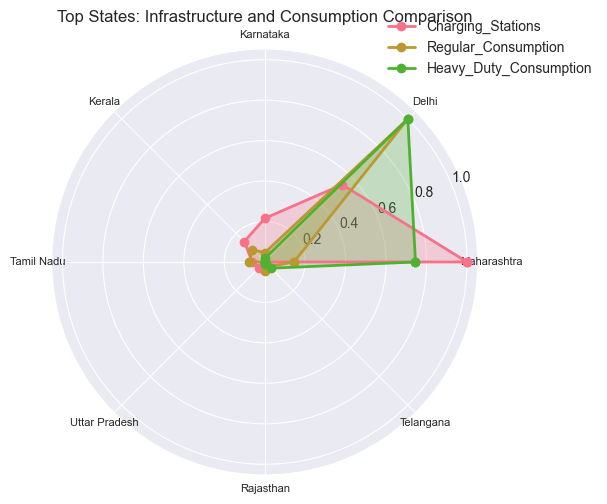

In [25]:
# Prepare monthly data for all vehicle type
def prepare_monthly_data(df):
    months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
    return df[months].values

# Create DataFrames for each vehicle type including monthly data
ev_2w_monthly = pd.DataFrame({
    'Year': ['FY24'],
    'Apr': [66877], 'May': [105582], 'Jun': [46106], 'Jul': [54614],
    'Aug': [62767], 'Sep': [64077], 'Oct': [75144], 'Nov': [92018],
    'Dec': [75855], 'Jan': [82018], 'Feb': [82508], 'Mar': [136560]
})

ev_3w_monthly = pd.DataFrame({
    'Year': ['FY24'],
    'Apr': [38083], 'May': [44698], 'Jun': [48151], 'Jul': [53877],
    'Aug': [56860], 'Sep': [57547], 'Oct': [57006], 'Nov': [53912],
    'Dec': [57653], 'Jan': [53459], 'Feb': [50598], 'Mar': [60641]
})

ev_4w_monthly = pd.DataFrame({
    'Year': ['FY24'],
    'Apr': [6041], 'May': [7718], 'Jun': [7974], 'Jul': [7771],
    'Aug': [7016], 'Sep': [6365], 'Oct': [7602], 'Nov': [7526],
    'Dec': [7490], 'Jan': [8440], 'Feb': [7438], 'Mar': [9051]
})

ev_bus_monthly = pd.DataFrame({
    'Year': ['FY24'],
    'Apr': [88], 'May': [280], 'Jun': [204], 'Jul': [144],
    'Aug': [269], 'Sep': [258], 'Oct': [239], 'Nov': [268],
    'Dec': [577], 'Jan': [549], 'Feb': [345], 'Mar': [472]
})

# Create combined DataFrame with electricity consumption and charging stations
elec_stations = pd.merge(
    charging_stations,
    elec_consumption,
    left_on='State',
    right_on='State',
    how='inner'
)

# Create figure with complex grid layout
plt.style.use('seaborn-v0_8-dark')
fig = plt.figure(figsize=(24, 32))
gs = GridSpec(5, 2, figure=fig)

# 1. Radar Chart comparing EV adoption metrics across states
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
top_states = elec_stations.nlargest(8, 'Charging_Stations')
angles = np.linspace(0, 2*np.pi, len(top_states), endpoint=False)

metrics = ['Charging_Stations', 'Regular_Consumption', 'Heavy_Duty_Consumption']
for metric in metrics:
    values = top_states[metric].values
    values = (values - values.min()) / (values.max() - values.min())
    values = np.concatenate((values, [values[0]]))
    angles_plot = np.concatenate((angles, [angles[0]]))
    ax1.plot(angles_plot, values, '-o', linewidth=2, label=metric)
    ax1.fill(angles_plot, values, alpha=0.25)

ax1.set_xticks(angles)
ax1.set_xticklabels(top_states['State'], size=8)
ax1.set_title('Top States: Infrastructure and Consumption Comparison', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

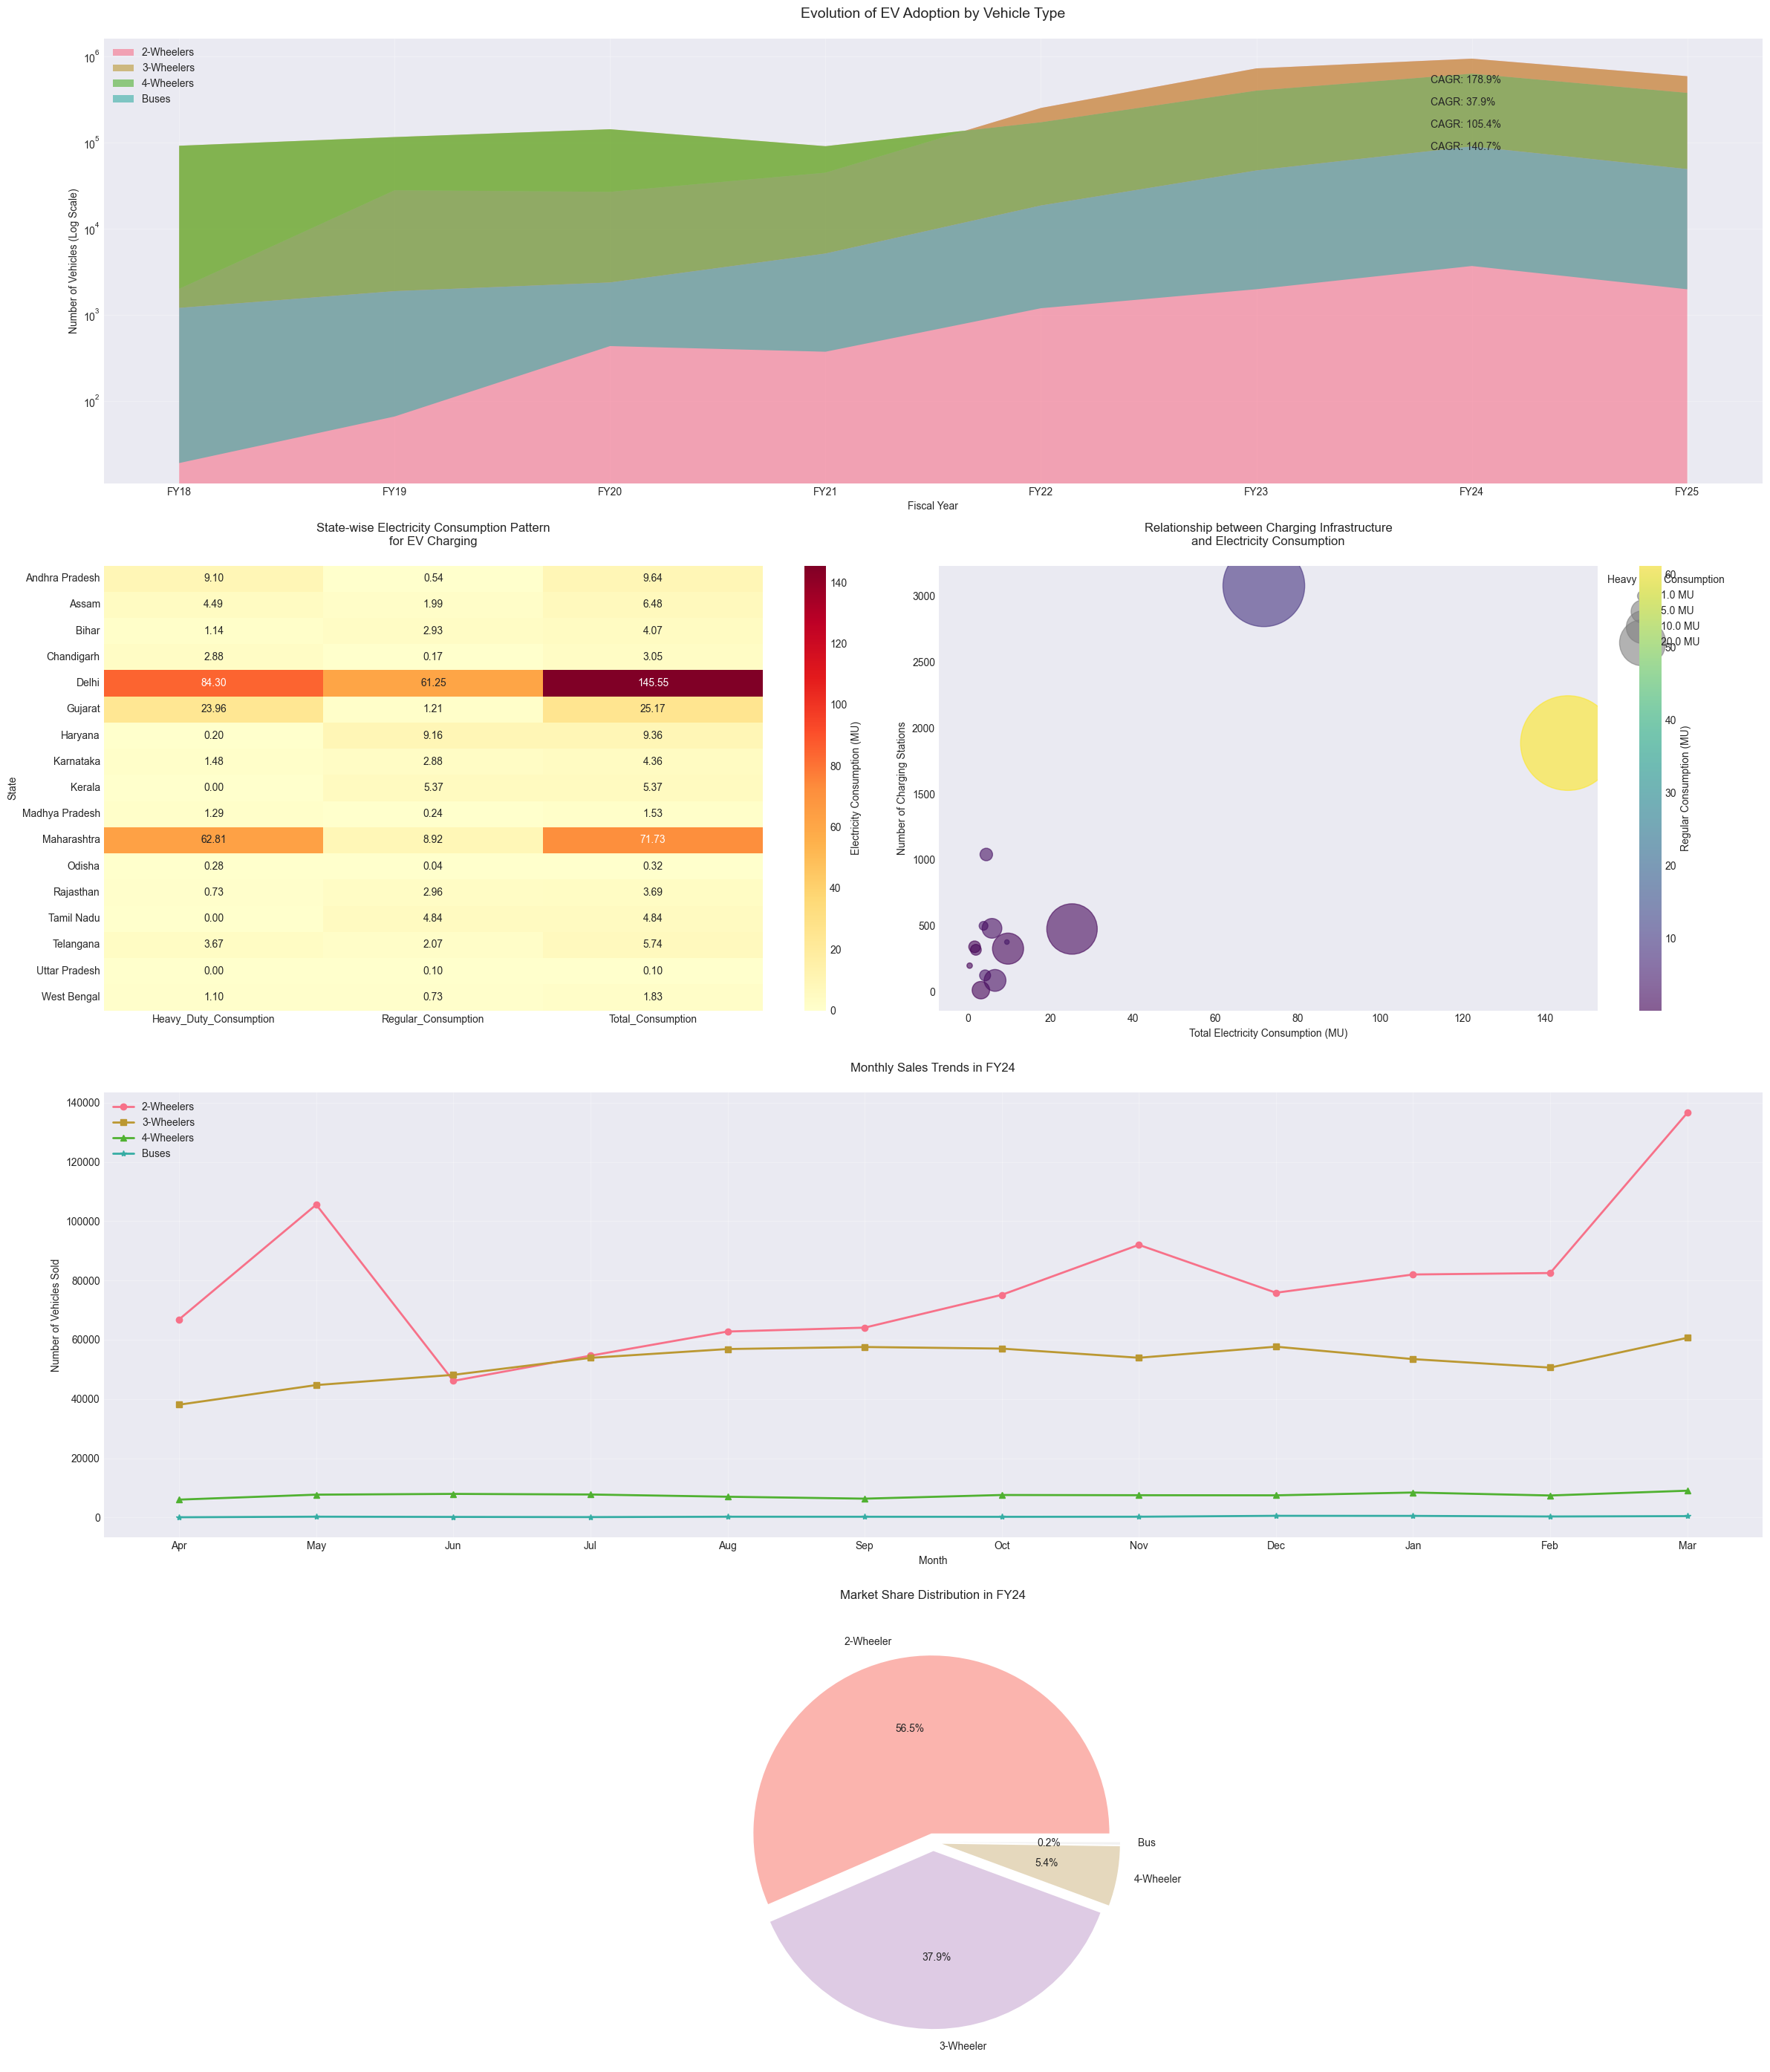

In [26]:
# Create figure with complex grid layout
plt.style.use('seaborn-v0_8-dark')
fig = plt.figure(figsize=(24, 28))
gs = GridSpec(4, 2, figure=fig)

# 1. Stacked Area Chart showing EV adoption trends
ax1 = fig.add_subplot(gs[0, :])
years = ev_2w['Year']
data_stack = np.vstack([ev_2w['Total'], ev_3w['Total'], 
                       ev_4w['Total'], ev_bus['Total']])

ax1.fill_between(years, data_stack[0], label='2-Wheelers', alpha=0.6)
ax1.fill_between(years, data_stack[1], data_stack[0], label='3-Wheelers', alpha=0.6)
ax1.fill_between(years, data_stack[2], data_stack[1], label='4-Wheelers', alpha=0.6)
ax1.fill_between(years, data_stack[3], data_stack[2], label='Buses', alpha=0.6)

ax1.set_title('Evolution of EV Adoption by Vehicle Type', pad=20, size=14)
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Number of Vehicles (Log Scale)')
ax1.set_yscale('log')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Calculate and add CAGR annotations
def calculate_cagr(initial, final, periods):
    return (np.power(final/initial, 1/periods) - 1) * 100

for i, data in enumerate([ev_2w, ev_3w, ev_4w, ev_bus]):
    cagr = calculate_cagr(data['Total'].iloc[0], data['Total'].iloc[-2], 6)
    ax1.annotate(f'CAGR: {cagr:.1f}%', 
                xy=(0.8, 0.9-i*0.05), 
                xycoords='axes fraction')


ax2 = fig.add_subplot(gs[1, 0])
elec_consumption['Total_Consumption'] = (elec_consumption['Regular_Consumption'] + 
                                       elec_consumption['Heavy_Duty_Consumption'])
elec_consumption_pivot = elec_consumption.pivot_table(
    values=['Regular_Consumption', 'Heavy_Duty_Consumption', 'Total_Consumption'],
    index='State'
)

sns.heatmap(elec_consumption_pivot, 
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Electricity Consumption (MU)'},
            ax=ax2)
ax2.set_title('State-wise Electricity Consumption Pattern\nfor EV Charging', pad=20)

# Bubble Chart showing relationship between different metrics
ax3 = fig.add_subplot(gs[1, 1])
merged_data = pd.merge(elec_consumption, 
                      charging_stations[['State', 'Charging_Stations']], 
                      on='State', 
                      how='inner')

scatter = ax3.scatter(merged_data['Total_Consumption'],
                     merged_data['Charging_Stations'],
                     s=merged_data['Heavy_Duty_Consumption']*100,
                     alpha=0.6,
                     c=merged_data['Regular_Consumption'],
                     cmap='viridis')

ax3.set_xlabel('Total Electricity Consumption (MU)')
ax3.set_ylabel('Number of Charging Stations')
ax3.set_title('Relationship between Charging Infrastructure\nand Electricity Consumption', pad=20)

# Add legend for bubble size
legend_elements = [plt.scatter([], [], s=s,
                             label=f'{s/100:.1f} MU',
                             c='gray', alpha=0.6)
                  for s in [100, 500, 1000, 2000]]
ax3.legend(handles=legend_elements, title='Heavy Duty Consumption',
          loc='upper left', bbox_to_anchor=(1, 1))

plt.colorbar(scatter, label='Regular Consumption (MU)')

# 4. Monthly Trend Analysis
ax4 = fig.add_subplot(gs[2, :])

# Create monthly data for FY24
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
fy24_2w = [66877, 105582, 46106, 54614, 62767, 64077, 75144, 92018, 75855, 82018, 82508, 136560]
fy24_3w = [38083, 44698, 48151, 53877, 56860, 57547, 57006, 53912, 57653, 53459, 50598, 60641]
fy24_4w = [6041, 7718, 7974, 7771, 7016, 6365, 7602, 7526, 7490, 8440, 7438, 9051]
fy24_bus = [88, 280, 204, 144, 269, 258, 239, 268, 577, 549, 345, 472]

ax4.plot(months, fy24_2w, marker='o', label='2-Wheelers', linewidth=2)
ax4.plot(months, fy24_3w, marker='s', label='3-Wheelers', linewidth=2)
ax4.plot(months, fy24_4w, marker='^', label='4-Wheelers', linewidth=2)
ax4.plot(months, fy24_bus, marker='*', label='Buses', linewidth=2)

ax4.set_title('Monthly Sales Trends in FY24', pad=20)
ax4.set_xlabel('Month')
ax4.set_ylabel('Number of Vehicles Sold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Market Share Analysis
ax5 = fig.add_subplot(gs[3, :])
market_share = pd.DataFrame({
    'Vehicle_Type': ['2-Wheeler', '3-Wheeler', '4-Wheeler', 'Bus'],
    'FY24_Sales': [944126, 632485, 90432, 3693]
})

market_share['Market_Share'] = market_share['FY24_Sales'] / market_share['FY24_Sales'].sum() * 100

colors = plt.cm.Pastel1(np.linspace(0, 1, len(market_share)))
wedges, texts, autotexts = ax5.pie(market_share['Market_Share'],
                                  labels=market_share['Vehicle_Type'],
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  explode=[0.05] * len(market_share))

ax5.set_title('Market Share Distribution in FY24', pad=20)

plt.tight_layout()
plt.show()



In [27]:
# Print Statistical Analysis
print("\nStatistical Analysis:")
print("\n1. Correlation Analysis:")
correlation = merged_data[['Total_Consumption', 'Charging_Stations', 
                         'Regular_Consumption', 'Heavy_Duty_Consumption']].corr()
print(correlation)

print("\n2. Growth Rates (FY23 to FY24):")
for vehicle_type, data in zip(['2-Wheeler', '3-Wheeler', '4-Wheeler', 'Bus'],
                            [ev_2w, ev_3w, ev_4w, ev_bus]):
    growth = (data['Total'].iloc[-2] - data['Total'].iloc[-3]) / data['Total'].iloc[-3] * 100
    print(f"{vehicle_type}: {growth:.1f}%")


Statistical Analysis:

1. Correlation Analysis:
                        Total_Consumption  Charging_Stations  \
Total_Consumption                1.000000           0.734061   
Charging_Stations                0.734061           1.000000   
Regular_Consumption              0.922998           0.516083   
Heavy_Duty_Consumption           0.973441           0.810622   

                        Regular_Consumption  Heavy_Duty_Consumption  
Total_Consumption                  0.922998                0.973441  
Charging_Stations                  0.516083                0.810622  
Regular_Consumption                1.000000                0.810388  
Heavy_Duty_Consumption             0.810388                1.000000  

2. Growth Rates (FY23 to FY24):
2-Wheeler: 29.7%
3-Wheeler: 57.4%
4-Wheeler: 90.4%
Bus: 86.1%


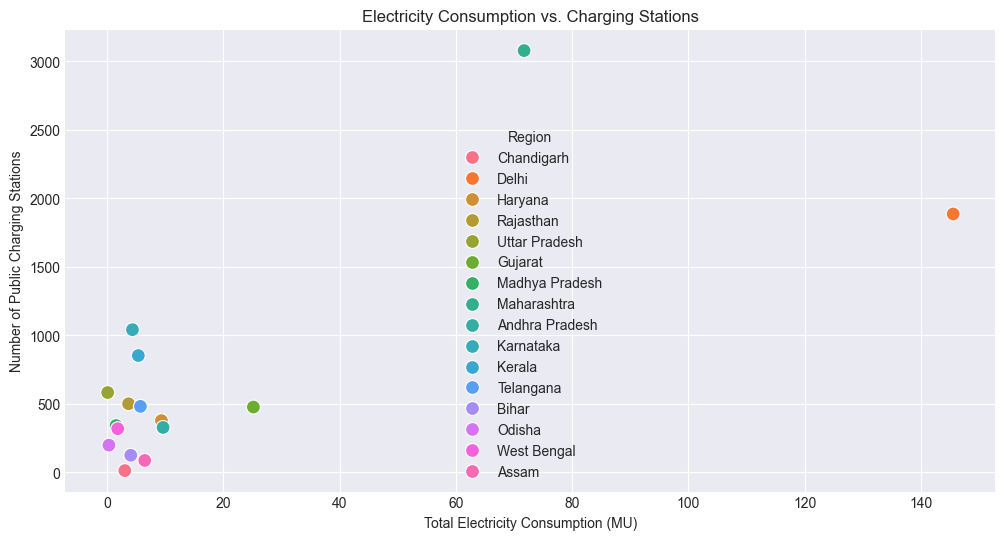

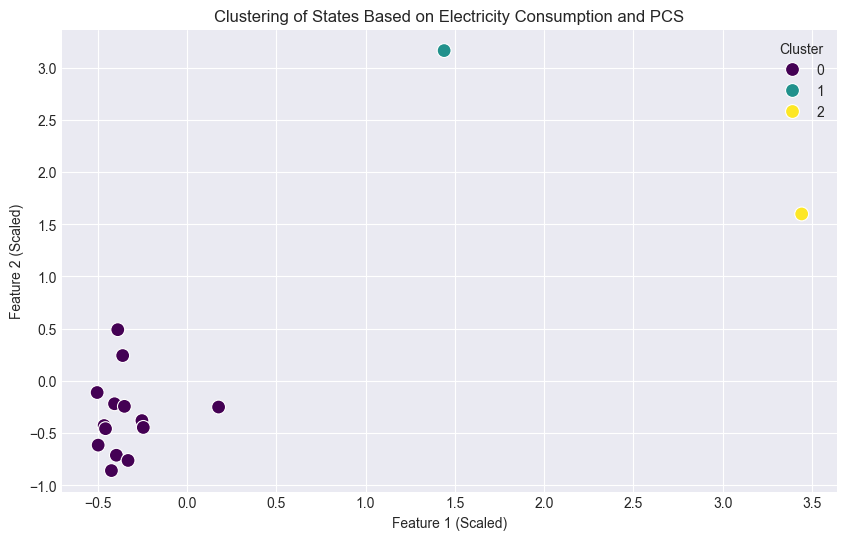

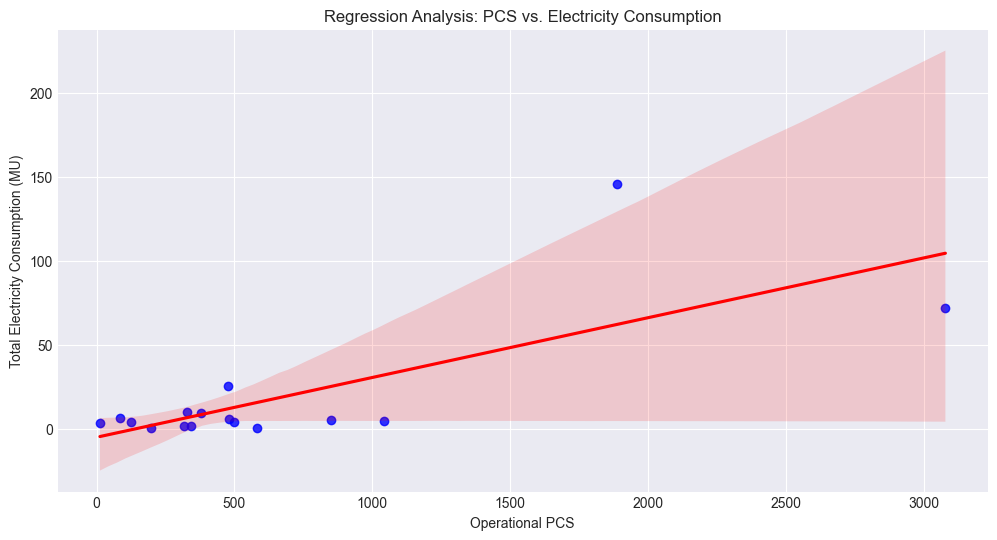

C:\Users\jayzzz45\AppData\Local\Temp\ipykernel_109444\2867850522.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_class.columns, y=importance, palette="viridis",)


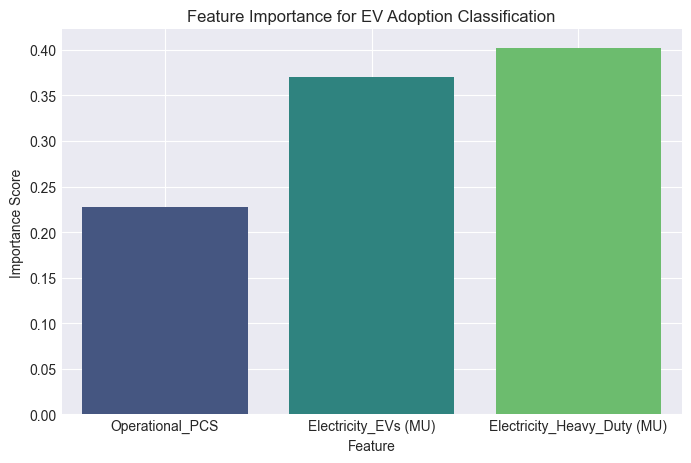

In [28]:
# Dataset 1: Electricity Consumption
data1 = {
    "Region": ["Chandigarh", "Delhi", "Haryana", "Rajasthan", "Uttar Pradesh", "Gujarat", 
               "Madhya Pradesh", "Maharashtra", "Andhra Pradesh", "Karnataka", "Kerala", 
               "Tamil Naidu", "Telangana", "Bihar", "Odisha", "West Bengal", "Assam"],
    "Electricity_EVs (MU)": [0.17, 61.25, 9.16, 2.96, 0.1, 1.21, 0.24, 8.92, 0.54, 2.88, 5.37, 4.84, 2.07, 2.93, 0.04, 0.73, 1.99],
    "Electricity_Heavy_Duty (MU)": [2.88, 84.3, 0.2, 0.73, 0, 23.96, 1.29, 62.81, 9.1, 1.48, 0, 0, 3.67, 1.14, 0.28, 1.1, 4.49],
    "Total_Electricity (MU)": [3.05, 145.54, 9.35, 3.69, 0.1, 25.17, 1.54, 71.73, 9.63, 4.36, 5.37, 4.84, 5.73, 4.07, 0.31, 1.83, 6.48]
}

# Dataset 2: Public Charging Stations
data2 = {
    "State": ["Andaman & Nicobar", "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chandigarh", 
              "Chhattisgarh", "D&D and DNH", "Delhi", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", 
              "Jammu & Kashmir", "Jharkhand", "Karnataka", "Kerala", "Lakshadweep", "Madhya Pradesh", 
              "Maharashtra", "Manipur", "Meghalaya", "Nagaland", "Odisha", "Pondicherry", "Punjab", 
              "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", 
              "West Bengal"],
    "Operational_PCS": [3, 327, 9, 86, 124, 12, 149, 1, 1886, 113, 476, 377, 44, 47, 135, 1041, 852, 1, 
                         341, 3079, 17, 21, 6, 198, 23, 158, 500, 2, 643, 481, 18, 582, 76, 318]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge datasets based on state/region
df = pd.merge(df1, df2, left_on="Region", right_on="State", how="inner")


# Visualize electricity consumption vs. charging stations
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Total_Electricity (MU)", y="Operational_PCS", hue="Region", s=100)
plt.title("Electricity Consumption vs. Charging Stations")
plt.xlabel("Total Electricity Consumption (MU)")
plt.ylabel("Number of Public Charging Stations")
plt.grid()
plt.show()


# clusterig analysis
scaler = StandardScaler()
X = scaler.fit_transform(df[["Total_Electricity (MU)", "Operational_PCS"]])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Clustering of States Based on Electricity Consumption and PCS")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.grid()
plt.show()


# Regression Analysis
X_reg = df[["Operational_PCS"]]
y_reg = df["Total_Electricity (MU)"]

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

# Predictions
predictions = reg_model.predict(X_reg)
df["Predicted_Electricity"] = predictions

# Regression Plot
plt.figure(figsize=(12, 6))
sns.regplot(x="Operational_PCS", y="Total_Electricity (MU)", data=df, color="blue", line_kws={"color": "red"})
plt.title("Regression Analysis: PCS vs. Electricity Consumption")
plt.xlabel("Operational PCS")
plt.ylabel("Total Electricity Consumption (MU)")
plt.grid()
plt.show()


# Classification

df["High_EV_Adoption"] = (df["Total_Electricity (MU)"] > df["Total_Electricity (MU)"].median()).astype(int)

X_class = df[["Operational_PCS", "Electricity_EVs (MU)", "Electricity_Heavy_Duty (MU)"]]
y_class = df["High_EV_Adoption"]

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_class, y_class)

# Feature Importance
importance = rf_classifier.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=X_class.columns, y=importance, palette="viridis",)
plt.title("Feature Importance for EV Adoption Classification")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.grid()
plt.show()


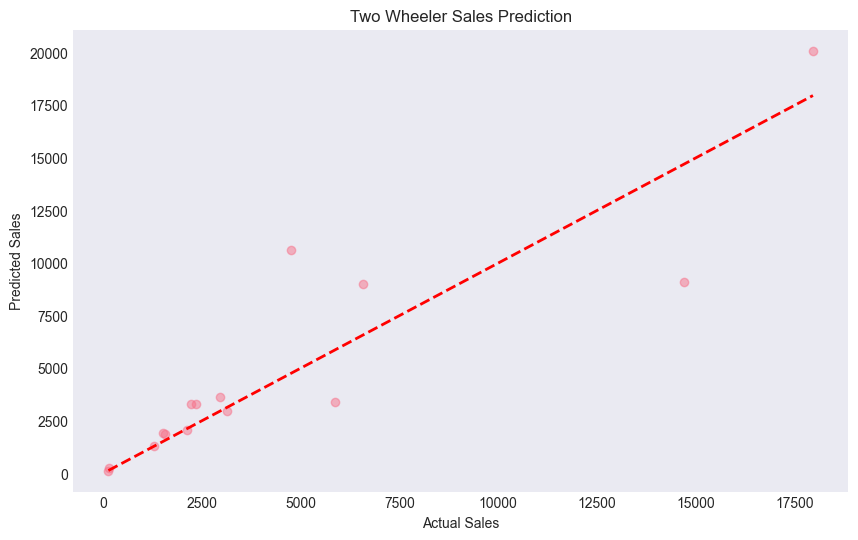

Two Wheeler Model Performance:
Mean Squared Error: 5686636.817059999
R-squared: 0.7735315836494543


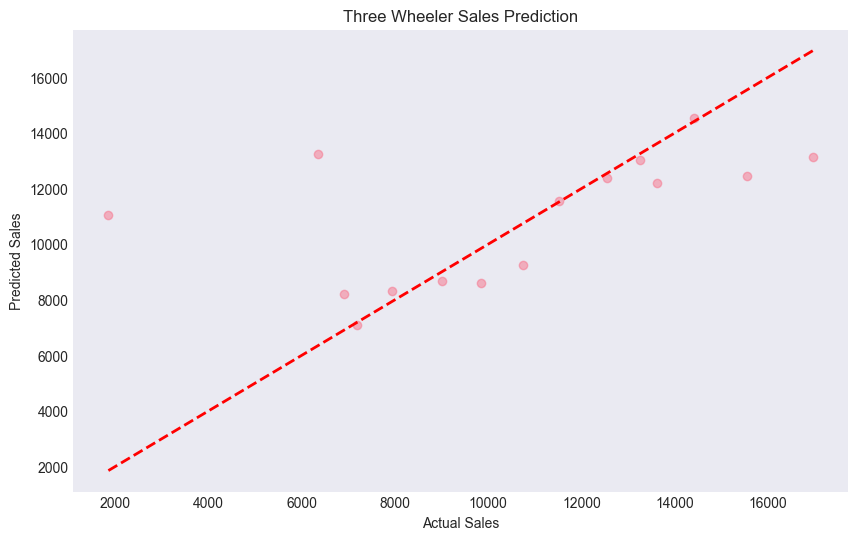

Three Wheeler Model Performance:
Mean Squared Error: 10960562.598400002
R-squared: 0.2868716526783919


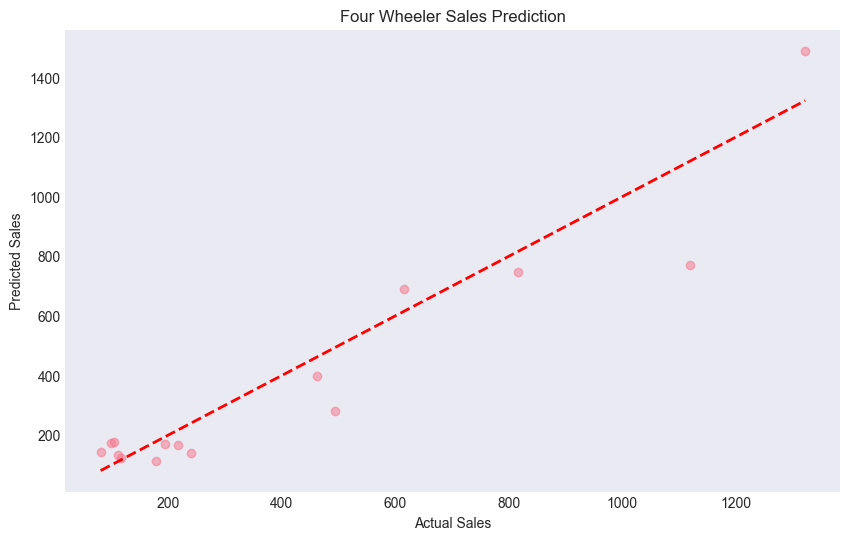

Four Wheeler Model Performance:
Mean Squared Error: 16226.370093333331
R-squared: 0.8888757892595985


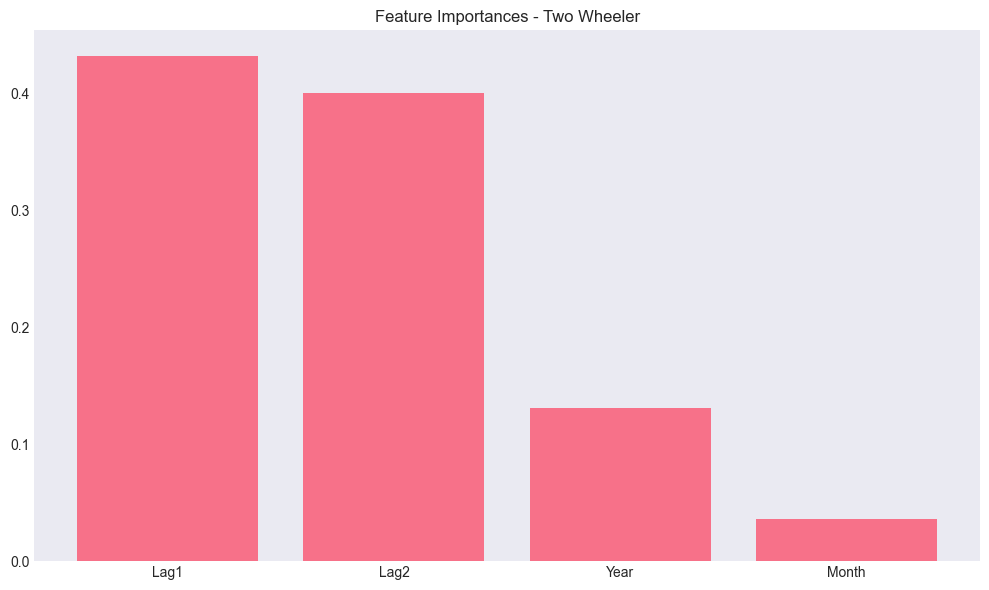

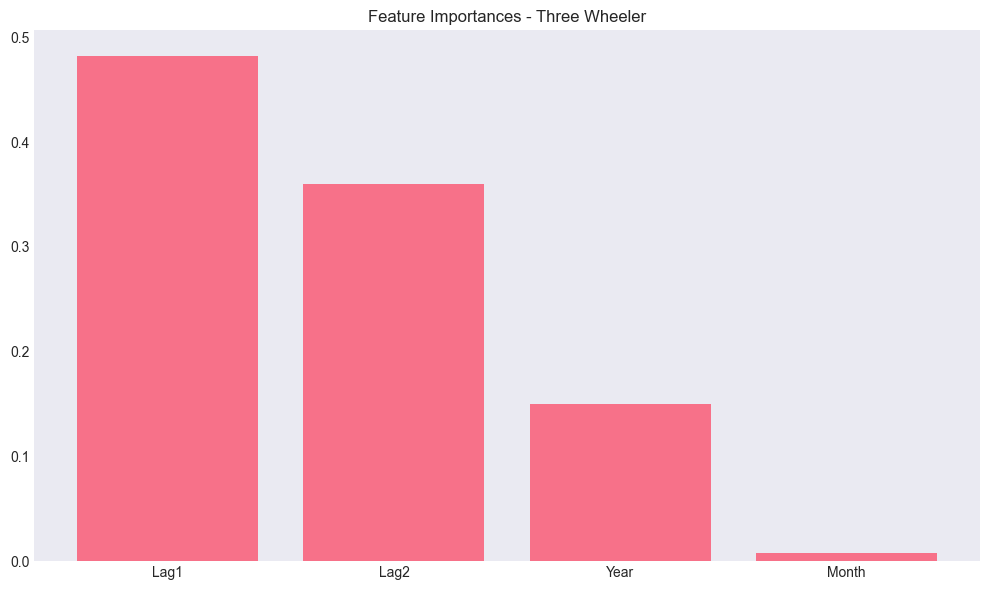

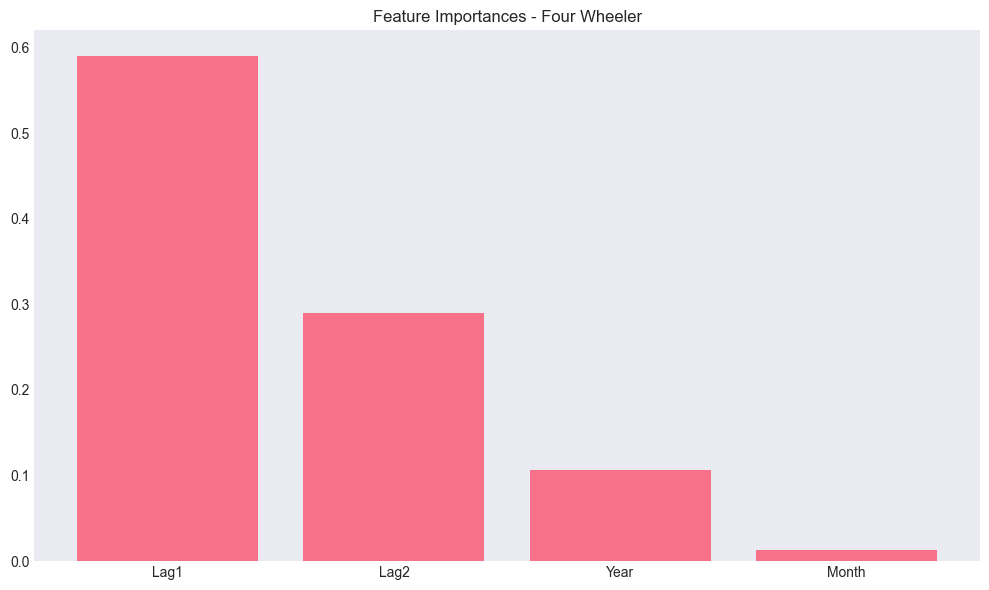

In [29]:


def prepare_predictive_dataset(df):
    # Aggregate monthly data and create features
    monthly_data = df.melt(id_vars=['S.No', 'Year'], 
                            var_name='Month', 
                            value_name='Sales')
    monthly_data = monthly_data[monthly_data['Month'] != 'Total']
    
    # Create lag features and other predictors
    monthly_data['Year_Numeric'] = monthly_data['Year'].str.replace('FY', '').astype(int)
    monthly_data['Month_Numeric'] = pd.Categorical(monthly_data['Month'], 
                                                   categories=['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar'],
                                                   ordered=True).codes
    
    monthly_data['Lag1'] = monthly_data.groupby('Year')['Sales'].shift(1)
    monthly_data['Lag2'] = monthly_data.groupby('Year')['Sales'].shift(2)
    
    monthly_data.dropna(inplace=True)
    return monthly_data

def train_predictive_model(data, vehicle_type):
    # Prepare features and target
    X = data[['Year_Numeric', 'Month_Numeric', 'Lag1', 'Lag2']]
    y = data['Sales']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{vehicle_type} Sales Prediction')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()
    
    print(f"{vehicle_type} Model Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    return rf_model, scaler

# Prepare and analyze each vehicle type
vehicle_types = {
    'Two Wheeler': ev2w,
    'Three Wheeler': ev3w,
    'Four Wheeler': ev4w
}

models = {}
for name, data in vehicle_types.items():
    processed_data = prepare_predictive_dataset(data)
    models[name] = train_predictive_model(processed_data, name)

# Feature Importance Visualization
def plot_feature_importance(model, vehicle_type):
    feature_names = ['Year', 'Month', 'Lag1', 'Lag2']
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances - {vehicle_type}")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.tight_layout()
    plt.show()

# Plot feature importances
for name, (model, _) in models.items():
    plot_feature_importance(model, name)

In [1]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
Using cached nbconvert-7.16.4-py3-none-any.whl (257 kB)
Using cached mistune-3.0.2-py3-none-any.whl (47 kB)
Using cached nbclient-0.10.0-py3-none-any.whl (25 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using 